In [1]:
# ARIMA
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import warnings

file_path = 'D:/Academics/Degree/Sem 6/Machine Learning/MLProject/Price_Agriculture_commodities_Week.csv'
df = pd.read_csv(file_path)

In [2]:

df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d-%m-%Y')
df.sort_values('Arrival_Date', inplace=True)

# --- Step 1 ---
print("Step 1: Creating a copy of the original DataFrame for ARIMA...")
arima_df = df.copy()
print("DataFrame 'arima_df' created as a copy.")
print("-" * 30)

Step 1: Creating a copy of the original DataFrame for ARIMA...
DataFrame 'arima_df' created as a copy.
------------------------------


In [ ]:
# --- Step 2 ---
print("Step 2: Preprocessing 'arima_df' for ARIMA...")


state_filter = 'Gujarat'
district_filter = 'Amreli'
market_filter = 'Damnagar'++
commodity_filter = 'Bhindi(Ladies Finger)'

arima_df = arima_df[
    (arima_df['State'] == state_filter) &
    (arima_df['District'] == district_filter) &
    (arima_df['Market'] == market_filter) &
    (arima_df['Commodity'] == commodity_filter)
]

if arima_df.empty:
    print(f"No data found for the specified filters. Cannot proceed with ARIMA for this combination.")
else:
    arima_df = arima_df.set_index('Arrival_Date')[['Modal Price']]


    arima_df = arima_df.asfreq('D') 
    arima_df.fillna(method='ffill', inplace=True) 

    print(f"Filtered and prepared time series for {commodity_filter} in {market_filter}:")
    print(arima_df)

    if len(arima_df) >= 5: 
         split_point = len(arima_df) - 1
         train_data_arima = arima_df.iloc[:split_point]
         test_data_arima = arima_df.iloc[split_point:]
         print(f"\nData split: {len(train_data_arima)} training points, {len(test_data_arima)} testing points.")
    else:
         print(f"\nWarning: Insufficient data points ({len(arima_df)}) for a meaningful train/test split. Using all data for training and creating an empty test set.")
         train_data_arima = arima_df
         test_data_arima = pd.DataFrame(columns=['Modal Price']) 

print("-" * 30)

Step 2: Preprocessing 'arima_df' for ARIMA...
Filtered and prepared time series for Bhindi(Ladies Finger) in Damnagar:
              Modal Price
Arrival_Date             
2023-07-27         4350.0
2023-07-28         3750.0
2023-07-29         2850.0
2023-07-30         3350.0
2023-07-31         3500.0

Data split: 4 training points, 1 testing points.
------------------------------


C:\Users\ksdha\AppData\Local\Temp\ipykernel_9756\4292501880.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  arima_df.fillna(method='ffill', inplace=True)


In [4]:
# --- Step 3 ---
arima_predictions = None 

if not train_data_arima.empty and not test_data_arima.empty :
    print("Step 3: Applying ARIMA model...")
    try:
        arima_model = ARIMA(train_data_arima['Modal Price'], order=(1, 0, 0)) 
        warnings.filterwarnings("ignore") 
        arima_model_fit = arima_model.fit()
        warnings.filterwarnings("default") 

        print(f"ARIMA model summary:\n{arima_model_fit.summary()}")

        start = test_data_arima.index[0]
        end = test_data_arima.index[-1]
        arima_predictions = arima_model_fit.predict(start=start, end=end)

        print("\nPrediction(s) made for the test period:")
        print(arima_predictions)

    except Exception as e:
        print(f"Error fitting/predicting with ARIMA model: {e}")
        arima_predictions = None 
elif arima_df.empty:
     print("Step 3: Skipped - No data after filtering.")
else:
    print("Step 3: Skipped - Insufficient data for train/test split.")

print("-" * 30)

Step 3: Applying ARIMA model...
ARIMA model summary:
                               SARIMAX Results                                
Dep. Variable:            Modal Price   No. Observations:                    4
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -30.848
Date:                Fri, 04 Apr 2025   AIC                             67.696
Time:                        00:39:49   BIC                             65.855
Sample:                    07-27-2023   HQIC                            63.656
                         - 07-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3608.1923    580.759      6.213      0.000    2469.926    4746.458
ar.L1          0.2154      4.386      0.049      0.961      -8.381       8.812

C:\Users\ksdha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
C:\Users\ksdha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


Step 5: Generating Plot...


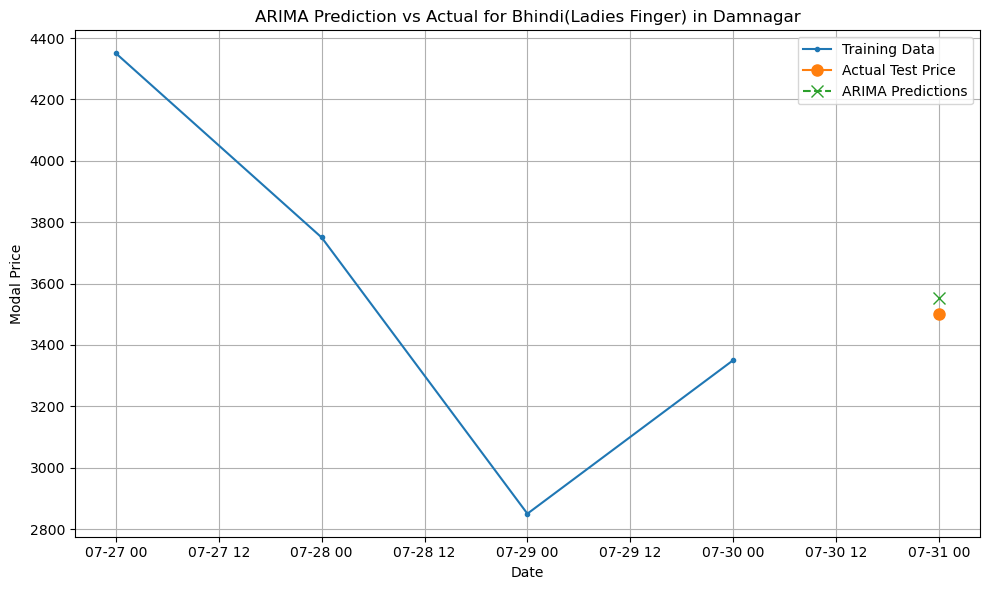

------------------------------
ARIMA process finished.


In [6]:
# --- Step 5 ---
print("Step 5: Generating Plot...")
if test_data_arima.empty or arima_predictions is None or arima_predictions.empty:
     print("Skipped plotting - No test data or predictions available.")
else:
    plt.figure(figsize=(10, 6))
    plt.plot(train_data_arima.index, train_data_arima['Modal Price'], label='Training Data', marker='.')
    plt.plot(test_data_arima.index, test_data_arima['Modal Price'], label='Actual Test Price', marker='o', markersize=8)

    plt.plot(test_data_arima.index, arima_predictions, label='ARIMA Predictions', linestyle='--', marker='x', markersize=8)

    plt.title(f'ARIMA Prediction vs Actual for {commodity_filter} in {market_filter}')
    plt.xlabel('Date')
    plt.ylabel('Modal Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("-" * 30)
print("ARIMA process finished.")

In [7]:
# SARIMA

# --- Step 1 ---
print("Step 1: Creating a copy of the original DataFrame for SARIMA...")
sarima_df = df.copy() 
print("DataFrame 'sarima_df' created.")

state_filter = 'Gujarat'
district_filter = 'Amreli'
market_filter = 'Damnagar'
commodity_filter = 'Bhindi(Ladies Finger)'

sarima_df = sarima_df[
    (sarima_df['State'] == state_filter) &
    (sarima_df['District'] == district_filter) &
    (sarima_df['Market'] == market_filter) &
    (sarima_df['Commodity'] == commodity_filter)
]
print(f"Filtered 'sarima_df' for {commodity_filter} in {market_filter}.")
print("-" * 30)

Step 1: Creating a copy of the original DataFrame for SARIMA...
DataFrame 'sarima_df' created.
Filtered 'sarima_df' for Bhindi(Ladies Finger) in Damnagar.
------------------------------


In [8]:
# --- Step 2 ---
print("Step 2: Preprocessing 'sarima_df' for SARIMA...")

if sarima_df.empty:
    print(f"No data found for the specified filters. Cannot proceed with SARIMA.")
    train_data_sarima = pd.DataFrame(columns=['Modal Price'])
    test_data_sarima = pd.DataFrame(columns=['Modal Price'])
else:
    sarima_df = sarima_df.set_index('Arrival_Date')[['Modal Price']]

    sarima_df = sarima_df.asfreq('D')
    sarima_df.fillna(method='ffill', inplace=True)

    print(f"Prepared time series for SARIMA (first 5 rows):")
    print(sarima_df.head())

    if len(sarima_df) >= 5: 
         split_point = len(sarima_df) - 1
         train_data_sarima = sarima_df.iloc[:split_point]
         test_data_sarima = sarima_df.iloc[split_point:]
         print(f"\nData split: {len(train_data_sarima)} training points, {len(test_data_sarima)} testing points.")
    else:
         print(f"\nWarning: Insufficient data points ({len(sarima_df)}) for a meaningful train/test split. Using all data for training.")
         train_data_sarima = sarima_df
         test_data_sarima = pd.DataFrame(columns=['Modal Price'])

print("-" * 30)

Step 2: Preprocessing 'sarima_df' for SARIMA...
Prepared time series for SARIMA (first 5 rows):
              Modal Price
Arrival_Date             
2023-07-27         4350.0
2023-07-28         3750.0
2023-07-29         2850.0
2023-07-30         3350.0
2023-07-31         3500.0

Data split: 4 training points, 1 testing points.
------------------------------


C:\Users\ksdha\AppData\Local\Temp\ipykernel_9756\1168533959.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sarima_df.fillna(method='ffill', inplace=True)


In [ ]:
# --- Step 3 ---
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

sarima_predictions = None 

if not train_data_sarima.empty and not test_data_sarima.empty :
    print("Step 3: Applying SARIMA model...")
    try:
        my_order = (1, 0, 0)            
        my_seasonal_order = (1, 1, 0, 0) 

        sarima_model = SARIMAX(train_data_sarima['Modal Price'],
                               order=my_order,
                               seasonal_order=my_seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False)

        warnings.filterwarnings("ignore") 
        sarima_model_fit = sarima_model.fit(disp=False) 
        warnings.filterwarnings("default")

        print(f"SARIMA model summary:\n{sarima_model_fit.summary()}")


        start = test_data_sarima.index[0]
        end = test_data_sarima.index[-1]
        sarima_predictions = sarima_model_fit.predict(start=start, end=end)

        print("\nPrediction(s) made for the test period:")
        print(sarima_predictions)

    except Exception as e:
        print(f"Error fitting/predicting with SARIMA model: {e}")
        sarima_predictions = None 

elif sarima_df.empty:
     print("Step 3: Skipped - No data after filtering.")
else:
    print("Step 3: Skipped - Insufficient data for train/test split.")

print("-" * 30)

Step 3: Applying SARIMA model...
SARIMA model summary:
                               SARIMAX Results                                
Dep. Variable:            Modal Price   No. Observations:                    4
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -23.198
Date:                Fri, 04 Apr 2025   AIC                             50.395
Time:                        00:39:50   BIC                             48.592
Sample:                    07-27-2023   HQIC                            46.771
                         - 07-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8891      0.168      5.299      0.000       0.560       1.218
sigma2      3.047e+05   6.52e+05      0.467      0.640   -9.74e+05    1.58e+

C:\Users\ksdha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
C:\Users\ksdha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


Step 5: Generating Plot...


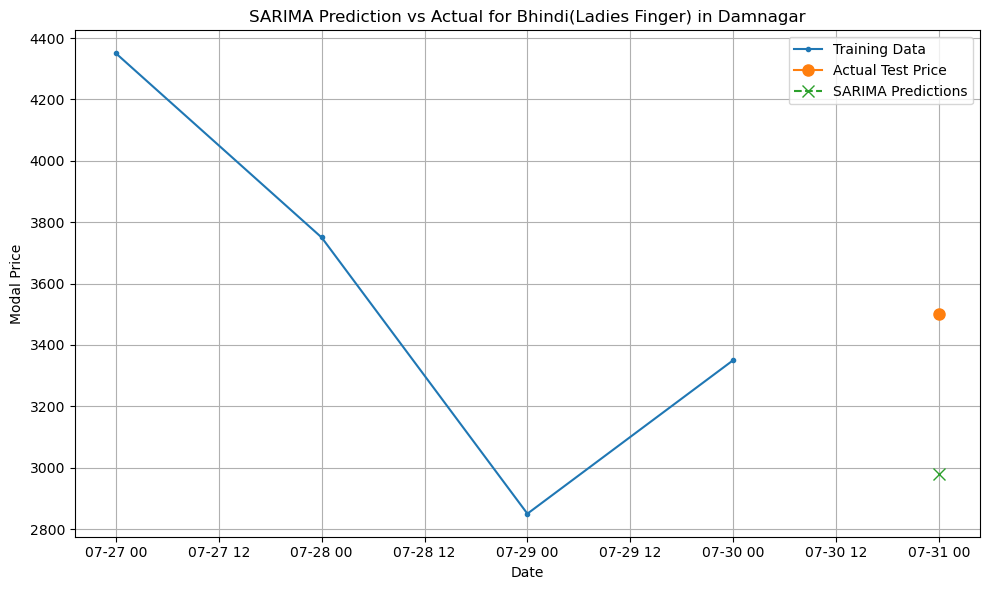

------------------------------
SARIMA process finished.


In [11]:
# --- Step 5 ---


print("Step 5: Generating Plot...")
if test_data_sarima.empty or sarima_predictions is None or sarima_predictions.empty:
     print("Skipped plotting - No test data or predictions available.")
else:
    plt.figure(figsize=(10, 6))
    plt.plot(train_data_sarima.index, train_data_sarima['Modal Price'], label='Training Data', marker='.')
    plt.plot(test_data_sarima.index, test_data_sarima['Modal Price'], label='Actual Test Price', marker='o', markersize=8)
    plt.plot(sarima_predictions.index, sarima_predictions, label='SARIMA Predictions', linestyle='--', marker='x', markersize=8)

    plt.title(f'SARIMA Prediction vs Actual for {commodity_filter} in {market_filter}')
    plt.xlabel('Date')
    plt.ylabel('Modal Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("-" * 30)
print("SARIMA process finished.")

In [12]:
# Random Forest
# --- Step 1 ---
print("Step 1: Creating a copy of the original DataFrame for Random Forest...")
rf_df = df.copy()
print("DataFrame 'rf_df' created as a copy.")
print("Original columns:", rf_df.columns.tolist())
print("-" * 30)

Step 1: Creating a copy of the original DataFrame for Random Forest...
DataFrame 'rf_df' created as a copy.
Original columns: ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Arrival_Date', 'Min Price', 'Max Price', 'Modal Price']
------------------------------


In [13]:
from sklearn.model_selection import train_test_split 
import pandas as pd

# --- Step 2 ---
print("Step 2: Preprocessing 'rf_df' for Random Forest...")

rf_df['DayOfWeek'] = rf_df['Arrival_Date'].dt.dayofweek
rf_df['DayOfMonth'] = rf_df['Arrival_Date'].dt.day
rf_df['Month'] = rf_df['Arrival_Date'].dt.month
print("Added date features.")

categorical_cols = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']
print(f"Applying One-Hot Encoding to: {categorical_cols}")

try:
    rf_df_processed = pd.get_dummies(rf_df, columns=categorical_cols, drop_first=True, dummy_na=False) # drop_first to reduce multicollinearity
    print("One-Hot Encoding complete.")
except Exception as e:
    print(f"Error during One-Hot Encoding: {e}")
    rf_df_processed = rf_df 


y = rf_df_processed['Modal Price']


X = rf_df_processed.drop(['Arrival_Date', 'Modal Price', 'Min Price', 'Max Price'], axis=1) 
print("Features (X) and Target (y) defined.")
print("Feature columns:", X.columns.tolist())

latest_date = rf_df_processed['Arrival_Date'].max()
test_indices = rf_df_processed[rf_df_processed['Arrival_Date'] == latest_date].index
train_indices = rf_df_processed[rf_df_processed['Arrival_Date'] < latest_date].index

if len(test_indices) == 0 or len(train_indices) == 0:
    print("\nWarning: Could not split data based on the latest date. Check data range.")

    X_train_rf, X_test_rf = X.loc[train_indices], pd.DataFrame(columns=X.columns)
    y_train_rf, y_test_rf = y.loc[train_indices], pd.Series(dtype=y.dtype)
else:
    X_train_rf, X_test_rf = X.loc[train_indices], X.loc[test_indices]
    y_train_rf, y_test_rf = y.loc[train_indices], y.loc[test_indices]
    print(f"\nData split temporally: Training on dates before {latest_date.date()}, Testing on {latest_date.date()}")
    print(f"  Training samples: {len(X_train_rf)}")
    print(f"  Testing samples: {len(X_test_rf)}")

print("-" * 30)

Step 2: Preprocessing 'rf_df' for Random Forest...
Added date features.
Applying One-Hot Encoding to: ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']
One-Hot Encoding complete.
Features (X) and Target (y) defined.
Feature columns: ['DayOfWeek', 'DayOfMonth', 'Month', 'State_Andhra Pradesh', 'State_Bihar', 'State_Chandigarh', 'State_Chattisgarh', 'State_Goa', 'State_Gujarat', 'State_Haryana', 'State_Himachal Pradesh', 'State_Jammu and Kashmir', 'State_Karnataka', 'State_Kerala', 'State_Madhya Pradesh', 'State_Maharashtra', 'State_Meghalaya', 'State_NCT of Delhi', 'State_Nagaland', 'State_Odisha', 'State_Pondicherry', 'State_Punjab', 'State_Rajasthan', 'State_Tamil Nadu', 'State_Telangana', 'State_Tripura', 'State_Uttar Pradesh', 'State_Uttrakhand', 'State_West Bengal', 'District_Agra', 'District_Ahmedabad', 'District_Ahmednagar', 'District_Ajmer', 'District_Alappuzha', 'District_Aligarh', 'District_Allahabad', 'District_Amarawati', 'District_Ambala', 'District_Ambedkarn

In [14]:
# --- Step 3 ---
from sklearn.ensemble import RandomForestRegressor

rf_model = None
rf_predictions = None

if not X_train_rf.empty and not X_test_rf.empty:
    print("Step 3: Applying Random Forest model...")
    try:
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

        print("Training Random Forest model...")
        rf_model.fit(X_train_rf, y_train_rf)
        print("Training complete.")

        rf_predictions = rf_model.predict(X_test_rf)
        print("\nPredictions made for the test set.")

    except Exception as e:
        print(f"Error fitting/predicting with Random Forest model: {e}")
        rf_model = None
        rf_predictions = None
else:
    print("Step 3: Skipped - Insufficient data for training/testing after split.")

print("-" * 30)

Step 3: Applying Random Forest model...
Training Random Forest model...
Training complete.

Predictions made for the test set.
------------------------------


In [15]:
# --- Step 4 ---
from sklearn.metrics import mean_absolute_error, mean_squared_error 
import numpy as np 

print("Step 4: Calculating Evaluation Metrics...")
if y_test_rf.empty or rf_predictions is None:
    print("Skipped evaluation - No test data or predictions available.")
else:
    try:
        mae_rf = mean_absolute_error(y_test_rf, rf_predictions)
        mse_rf = mean_squared_error(y_test_rf, rf_predictions)
        rmse_rf = np.sqrt(mse_rf) 

        print(f"Random Forest Model Evaluation Metrics:")
        print(f"  MAE:  {mae_rf:.2f}")
        print(f"  MSE:  {mse_rf:.2f}")
        print(f"  RMSE: {rmse_rf:.2f}")
    except Exception as e:
        print(f"Error calculating metrics: {e}")

print("-" * 30)

Step 4: Calculating Evaluation Metrics...
Random Forest Model Evaluation Metrics:
  MAE:  672.65
  MSE:  2782955.42
  RMSE: 1668.22
------------------------------


Step 5: Generating Plot (Actual vs. Predicted Scatter Plot)...


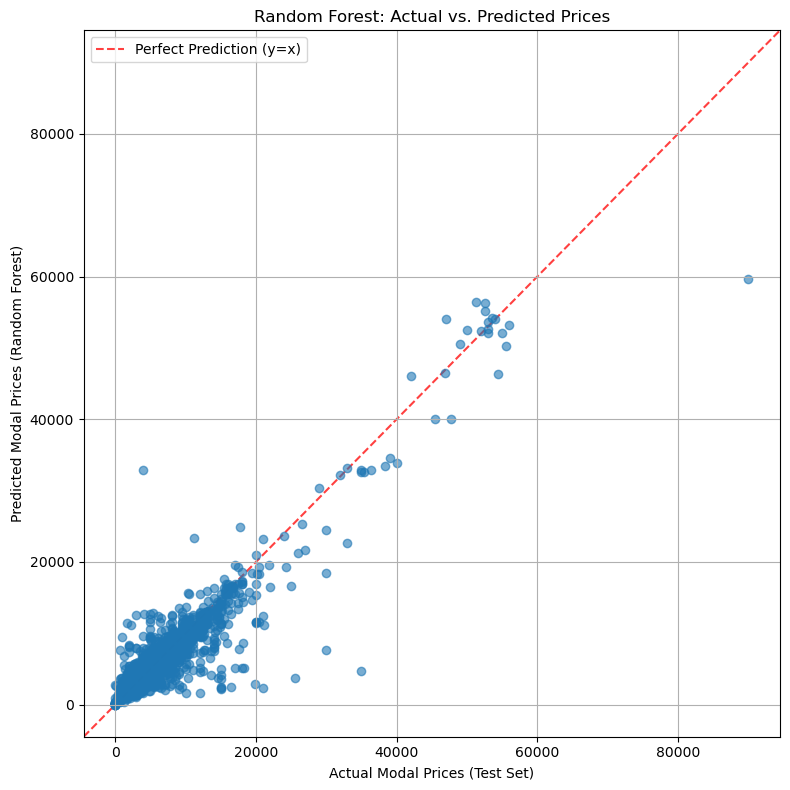

------------------------------
Random Forest process finished.


In [16]:
# --- Step 5 ---


print("Step 5: Generating Plot (Actual vs. Predicted Scatter Plot)...")
if y_test_rf.empty or rf_predictions is None:
     print("Skipped plotting - No test data or predictions available.")
else:
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test_rf, rf_predictions, alpha=0.6)
    lims = [
        np.min([plt.xlim(), plt.ylim()]), 
        np.max([plt.xlim(), plt.ylim()]), 
    ]
    plt.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Perfect Prediction (y=x)')
    plt.xlim(lims)
    plt.ylim(lims)
    plt.xlabel("Actual Modal Prices (Test Set)")
    plt.ylabel("Predicted Modal Prices (Random Forest)")
    plt.title("Random Forest: Actual vs. Predicted Prices")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("-" * 30)
print("Random Forest process finished.")

In [17]:
# XGBoost

# --- Step 1 ---
print("Step 1: Creating a copy of the original DataFrame for XGBoost...")
xgb_df = df.copy()
print("DataFrame 'xgb_df' created as a copy.")
print("-" * 30)

Step 1: Creating a copy of the original DataFrame for XGBoost...
DataFrame 'xgb_df' created as a copy.
------------------------------


In [18]:
# --- Step 2 ---
from sklearn.preprocessing import OneHotEncoder 
import pandas as pd

print("Step 2: Preprocessing 'xgb_df' for XGBoost...")

xgb_df['DayOfWeek'] = xgb_df['Arrival_Date'].dt.dayofweek
xgb_df['DayOfMonth'] = xgb_df['Arrival_Date'].dt.day
xgb_df['Month'] = xgb_df['Arrival_Date'].dt.month
print("Added date features.")


categorical_cols = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']
print(f"Applying One-Hot Encoding to: {categorical_cols}")

try:
    xgb_df_processed = pd.get_dummies(xgb_df, columns=categorical_cols, drop_first=True, dummy_na=False)
    print("One-Hot Encoding complete.")
except Exception as e:
    print(f"Error during One-Hot Encoding: {e}")
    xgb_df_processed = xgb_df 

y = xgb_df_processed['Modal Price']

X = xgb_df_processed.drop(['Arrival_Date', 'Modal Price', 'Min Price', 'Max Price'], axis=1)
print("Features (X) and Target (y) defined.")


latest_date = xgb_df_processed['Arrival_Date'].max()
test_indices = xgb_df_processed[xgb_df_processed['Arrival_Date'] == latest_date].index
train_indices = xgb_df_processed[xgb_df_processed['Arrival_Date'] < latest_date].index

if len(test_indices) == 0 or len(train_indices) == 0:
    print("\nWarning: Could not split data based on the latest date. Setting empty test set.")
    X_train_xgb, X_test_xgb = X.loc[train_indices], pd.DataFrame(columns=X.columns)
    y_train_xgb, y_test_xgb = y.loc[train_indices], pd.Series(dtype=y.dtype)
else:
    X_train_xgb, X_test_xgb = X.loc[train_indices], X.loc[test_indices]
    y_train_xgb, y_test_xgb = y.loc[train_indices], y.loc[test_indices]
    print(f"\nData split temporally: Training on dates before {latest_date.date()}, Testing on {latest_date.date()}")
    print(f"  Training samples: {len(X_train_xgb)}")
    print(f"  Testing samples: {len(X_test_xgb)}")

print("-" * 30)

Step 2: Preprocessing 'xgb_df' for XGBoost...
Added date features.
Applying One-Hot Encoding to: ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']
One-Hot Encoding complete.
Features (X) and Target (y) defined.

Data split temporally: Training on dates before 2023-07-31, Testing on 2023-07-31
  Training samples: 9721
  Testing samples: 4879
------------------------------


In [21]:
# --- Step 3 ---
!pip install xgboost
import xgboost as xgb 
xgb_model = None
xgb_predictions = None

if not X_train_xgb.empty and not X_test_xgb.empty:
    print("Step 3: Applying XGBoost model...")
    try:
        xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                                     n_estimators=100,
                                     learning_rate=0.1,
                                     max_depth=5, 
                                     random_state=42,
                                     n_jobs=-1)


        print("Training XGBoost model...")

        xgb_model.fit(X_train_xgb, y_train_xgb)
        print("Training complete.")

        xgb_predictions = xgb_model.predict(X_test_xgb)
        print("\nPredictions made for the test set.")


    except Exception as e:
        print(f"Error fitting/predicting with XGBoost model: {e}")
        xgb_model = None
        xgb_predictions = None
else:
    print("Step 3: Skipped - Insufficient data for training/testing after split.")

print("-" * 30)

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 3.4 MB/s eta 0:00:45
   ---------------------------------------- 1.0/150.0 MB 2.2 MB/s eta 0:01:08
   ---------------------------------------- 1.6/150.0 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 2.1/150.0 MB 2.7 MB/s eta 0:00:55
    --------------------------------------- 3.1/150.0 MB 2.9 MB/s eta 0:00:51
    --------------------------------------- 3.4/150.0 MB 2.8 MB/s eta 0:00:53
   - -------------------------------------- 3.9/150.0 MB 2.8 MB/s eta 0:00:53
   - -------------------------------------- 4.7/150.0 MB 2.9 MB/s eta 0:00:51
   - -------------------------------------- 5.2/150.0 MB 2.8 MB/s eta 0:00:51
   - -------------------------------------- 5.8/150.0 MB 2.8 MB/s eta 0:00:52
   - -------------------------------------- 7.3/150.0 MB 3.1 MB/s eta 0:00:46
   -- ------------------------------------- 7.9/150.0 MB 3.2 MB/s eta 0

C:\Users\ksdha\anaconda3\Lib\threading.py:1016: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  del self._target, self._args, self._kwargs
C:\Users\ksdha\anaconda3\Lib\threading.py:1016: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  del self._target, self._args, self._kwargs
C:\Users\ksdha\anaconda3\Lib\threading.py:1016: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  del self._target, self._args, self._kwargs


Training complete.

Predictions made for the test set.
------------------------------


In [22]:
# --- Step 4 ---

print("Step 4: Calculating Evaluation Metrics...")
if y_test_xgb.empty or xgb_predictions is None:
    print("Skipped evaluation - No test data or predictions available.")
else:
    try:
        mae_xgb = mean_absolute_error(y_test_xgb, xgb_predictions)
        mse_xgb = mean_squared_error(y_test_xgb, xgb_predictions)
        rmse_xgb = np.sqrt(mse_xgb)

        print(f"XGBoost Model Evaluation Metrics:")
        print(f"  MAE:  {mae_xgb:.2f}")
        print(f"  MSE:  {mse_xgb:.2f}")
        print(f"  RMSE: {rmse_xgb:.2f}")
    except Exception as e:
        print(f"Error calculating metrics: {e}")

print("-" * 30)

Step 4: Calculating Evaluation Metrics...
XGBoost Model Evaluation Metrics:
  MAE:  1701.33
  MSE:  6680072.13
  RMSE: 2584.58
------------------------------


Step 5: Generating Plot (Actual vs. Predicted Scatter Plot)...


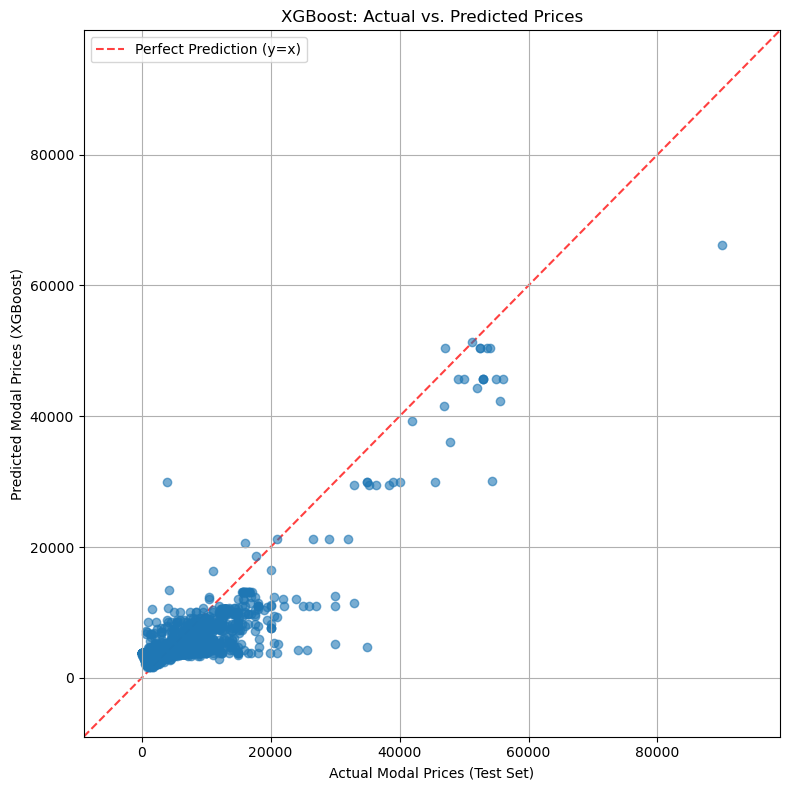

------------------------------
XGBoost process finished.


In [23]:
# --- Step 5 ---
import matplotlib.pyplot as plt
import numpy as np

print("Step 5: Generating Plot (Actual vs. Predicted Scatter Plot)...")
if y_test_xgb.empty or xgb_predictions is None:
     print("Skipped plotting - No test data or predictions available.")
else:
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test_xgb, xgb_predictions, alpha=0.6)

    all_values = np.concatenate([y_test_xgb.values, xgb_predictions])
    min_val = all_values.min()
    max_val = all_values.max()
    range_buffer = (max_val - min_val) * 0.1 

    lims = [min_val - range_buffer, max_val + range_buffer]

    plt.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Perfect Prediction (y=x)')

    plt.xlim(lims)
    plt.ylim(lims)

    plt.xlabel("Actual Modal Prices (Test Set)")
    plt.ylabel("Predicted Modal Prices (XGBoost)")
    plt.title("XGBoost: Actual vs. Predicted Prices")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("-" * 30)
print("XGBoost process finished.")

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

print("--- Evaluation Metrics Calculation ---")

# --- ARIMA Evaluation ---
print("\n--- ARIMA Model ---")

actuals_arima = test_data_arima['Modal Price'] if not test_data_arima.empty else pd.Series(dtype=float)

if not actuals_arima.empty and arima_predictions is not None and arima_predictions.notna().all():
    y_true = actuals_arima.values
    y_pred = arima_predictions.values if isinstance(arima_predictions, pd.Series) else np.array([arima_predictions])

    if len(y_true) == len(y_pred):
        try:
            mae_arima = mean_absolute_error(y_true, y_pred)
            mse_arima = mean_squared_error(y_true, y_pred)
            rmse_arima = np.sqrt(mse_arima)
            r2_arima = r2_score(y_true, y_pred) if len(y_true) > 1 else float('nan')
            mape_arima = mean_absolute_percentage_error(y_true, y_pred) * 100 

            print(f"MAE:  {mae_arima:.2f}")
            print(f"MSE:  {mse_arima:.2f}")
            print(f"RMSE: {rmse_arima:.2f}")
            print(f"R²:   {r2_arima:.4f}")
            print(f"MAPE: {mape_arima:.2f}%")
        except Exception as e:
            print(f"Error calculating ARIMA metrics: {e}")
    else:
        print("Mismatch between number of actuals and predictions.")
else:
    print("Cannot calculate ARIMA metrics (missing actuals or predictions).")

# --- SARIMA Evaluation ---
print("\n--- SARIMA Model ---")

actuals_sarima = test_data_sarima['Modal Price'] if not test_data_sarima.empty else pd.Series(dtype=float)

if not actuals_sarima.empty and sarima_predictions is not None and sarima_predictions.notna().all():
    y_true = actuals_sarima.values
    y_pred = sarima_predictions.values if isinstance(sarima_predictions, pd.Series) else np.array([sarima_predictions]) 

    if len(y_true) == len(y_pred):
        try:
            mae_sarima = mean_absolute_error(y_true, y_pred)
            mse_sarima = mean_squared_error(y_true, y_pred)
            rmse_sarima = np.sqrt(mse_sarima)
            r2_sarima = r2_score(y_true, y_pred) if len(y_true) > 1 else float('nan') 
            mape_sarima = mean_absolute_percentage_error(y_true, y_pred) * 100

            print(f"MAE:  {mae_sarima:.2f}")
            print(f"MSE:  {mse_sarima:.2f}")
            print(f"RMSE: {rmse_sarima:.2f}")
            print(f"R²:   {r2_sarima:.4f}")
            print(f"MAPE: {mape_sarima:.2f}%")
        except Exception as e:
            print(f"Error calculating SARIMA metrics: {e}")
    else:
         print("Mismatch between number of actuals and predictions.")
else:
    print("Cannot calculate SARIMA metrics (missing actuals or predictions).")

# --- Random Forest Evaluation ---
print("\n--- Random Forest Model ---")
if not y_test_rf.empty and rf_predictions is not None:
    y_true = y_test_rf.values if isinstance(y_test_rf, pd.Series) else y_test_rf
    y_pred = rf_predictions

    if len(y_true) == len(y_pred):
        try:
            mae_rf = mean_absolute_error(y_true, y_pred)
            mse_rf = mean_squared_error(y_true, y_pred)
            rmse_rf = np.sqrt(mse_rf)
            r2_rf = r2_score(y_true, y_pred)
            mape_rf = mean_absolute_percentage_error(y_true, y_pred) * 100

            print(f"MAE:  {mae_rf:.2f}")
            print(f"MSE:  {mse_rf:.2f}")
            print(f"RMSE: {rmse_rf:.2f}")
            print(f"R²:   {r2_rf:.4f}")
            print(f"MAPE: {mape_rf:.2f}%")
        except Exception as e:
            print(f"Error calculating Random Forest metrics: {e}")
    else:
        print("Mismatch between number of actuals and predictions.")
else:
    print("Cannot calculate Random Forest metrics (missing actuals or predictions).")

# --- XGBoost Evaluation ---
print("\n--- XGBoost Model ---")
if not y_test_xgb.empty and xgb_predictions is not None:
    y_true = y_test_xgb.values if isinstance(y_test_xgb, pd.Series) else y_test_xgb
    y_pred = xgb_predictions 
    if len(y_true) == len(y_pred):
        try:
            mae_xgb = mean_absolute_error(y_true, y_pred)
            mse_xgb = mean_squared_error(y_true, y_pred)
            rmse_xgb = np.sqrt(mse_xgb)
            r2_xgb = r2_score(y_true, y_pred)
            mape_xgb = mean_absolute_percentage_error(y_true, y_pred) * 100

            print(f"MAE:  {mae_xgb:.2f}")
            print(f"MSE:  {mse_xgb:.2f}")
            print(f"RMSE: {rmse_xgb:.2f}")
            print(f"R²:   {r2_xgb:.4f}")
            print(f"MAPE: {mape_xgb:.2f}%")
        except Exception as e:
            print(f"Error calculating XGBoost metrics: {e}")
    else:
        print("Mismatch between number of actuals and predictions.")
else:
    print("Cannot calculate XGBoost metrics (missing actuals or predictions).")

print("\n--- Evaluation Complete ---")

--- Evaluation Metrics Calculation ---

--- ARIMA Model ---
MAE:  52.58
MSE:  2764.48
RMSE: 52.58
R²:   nan
MAPE: 1.50%

--- SARIMA Model ---
MAE:  521.61
MSE:  272078.06
RMSE: 521.61
R²:   nan
MAPE: 14.90%

--- Random Forest Model ---
MAE:  672.65
MSE:  2782955.42
RMSE: 1668.22
R²:   0.8880
MAPE: 87.04%

--- XGBoost Model ---
MAE:  1701.33
MSE:  6680072.13
RMSE: 2584.58
R²:   0.7312
MAPE: 475.46%

--- Evaluation Complete ---


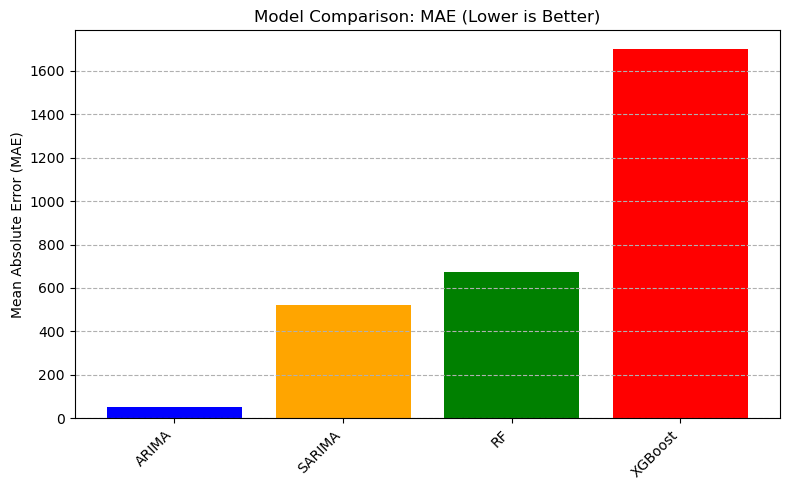

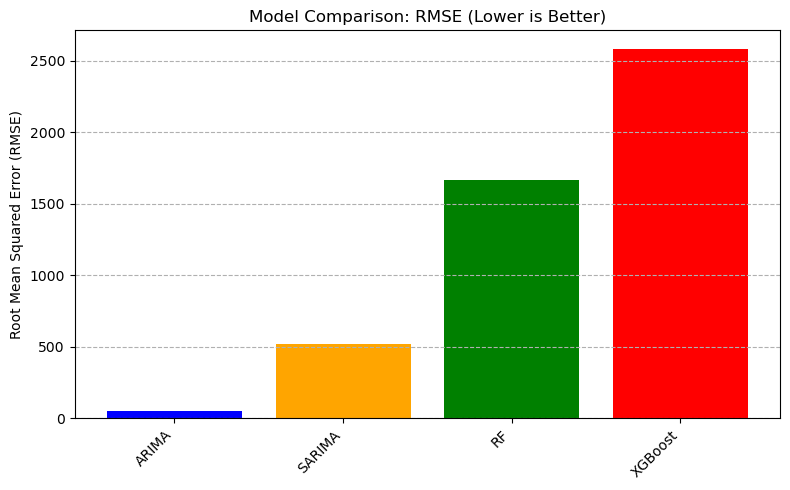

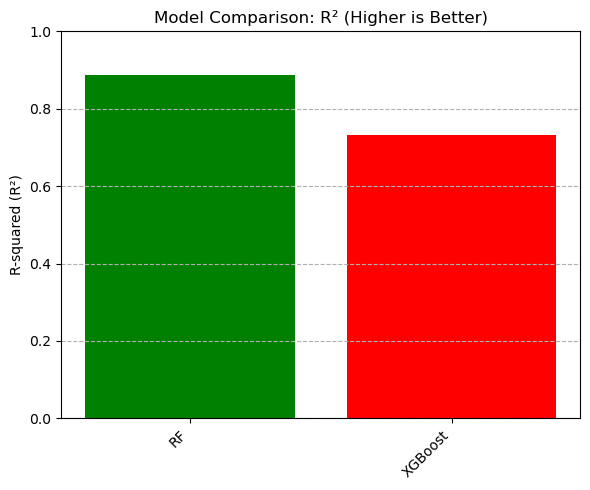

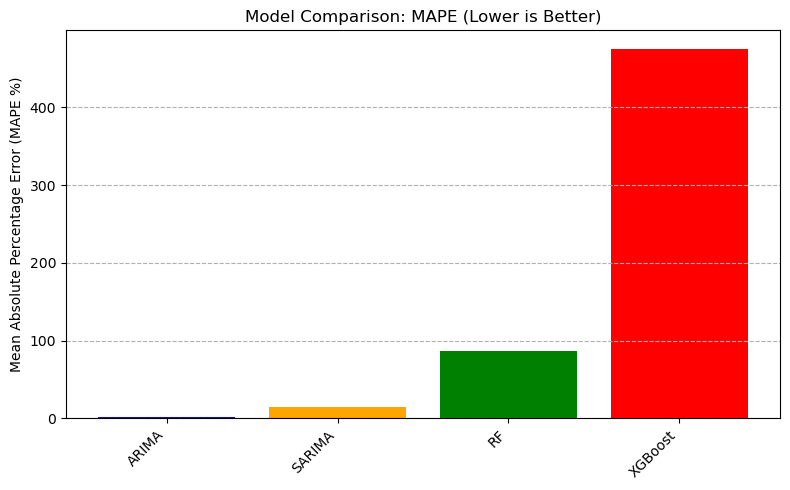

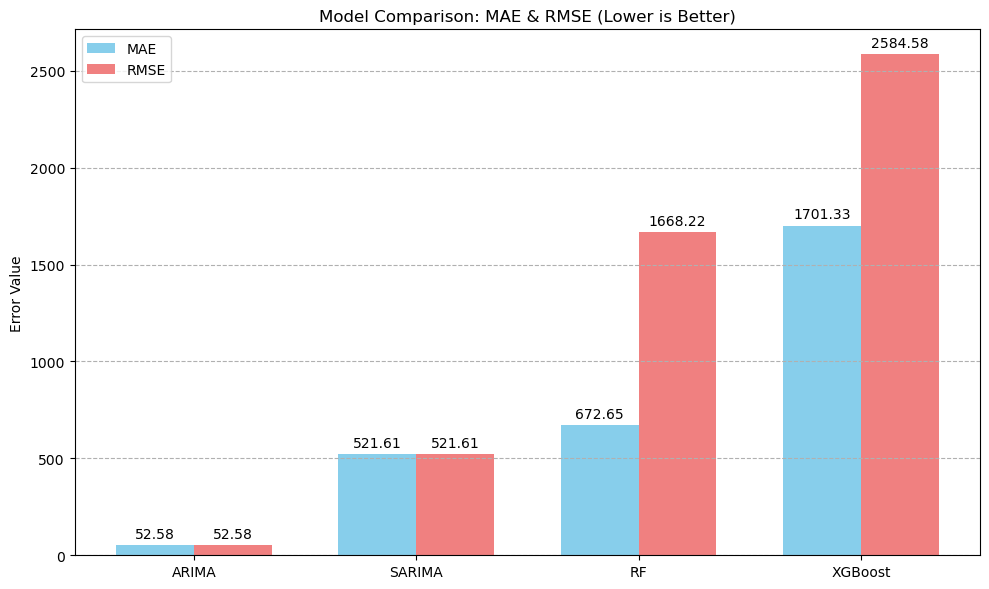

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data from your results ---
models = ['ARIMA', 'SARIMA', 'RF', 'XGBoost']
mae_values = [52.58, 521.61, 672.65, 1701.33]
mse_values = [2764.47, 272078.06, 2782955.42, 6680072.13]
rmse_values = [52.58, 521.61, 1668.22, 2584.58]
models_r2 = ['RF', 'XGBoost']
r2_values = [0.8880, 0.7312]
mape_values = [1.50, 14.90, 87.04, 475.46] 
x = np.arange(len(models)) 

# --- Plot 1: Separate Bar Chart for MAE ---
plt.figure(figsize=(8, 5))
plt.bar(models, mae_values, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison: MAE (Lower is Better)')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- Plot 2: Separate Bar Chart for RMSE ---
plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison: RMSE (Lower is Better)')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- Plot 3: Separate Bar Chart for R-squared (Only RF & XGBoost) ---
plt.figure(figsize=(6, 5))
plt.bar(models_r2, r2_values, color=['green', 'red'])
plt.ylabel('R-squared (R²)')
plt.title('Model Comparison: R² (Higher is Better)')
plt.ylim(0, 1) 
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- Plot 4: Separate Bar Chart for MAPE ---
plt.figure(figsize=(8, 5))
plt.bar(models, mape_values, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Mean Absolute Percentage Error (MAPE %)')
plt.title('Model Comparison: MAPE (Lower is Better)')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# --- Plot 5: Grouped Bar Chart for MAE and RMSE ---
width = 0.35 
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mae_values, width, label='MAE', color='skyblue')
rects2 = ax.bar(x + width/2, rmse_values, width, label='RMSE', color='lightcoral')


ax.set_ylabel('Error Value')
ax.set_title('Model Comparison: MAE & RMSE (Lower is Better)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', linestyle='--')
ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')
fig.tight_layout()
plt.show()